In [1]:
import pandas as pd
import numpy as np

In [2]:
np.random.seed(42)
n_row = 100

In [6]:
df = pd.DataFrame({
    'transaction_id': np.arange(1, n_row + 1),
    'customer_id': np.random.randint(1000, 1020, n_row),
    'date': pd.date_range('2024-06-01', periods=n_row, freq='D'),
    'amount': np.round(np.random.exponential(scale=75, size=n_row), 2),
    'payment_method': np.random.choice(['credit_card', 'debit_card', 'cash', 'paypal','gcash'], n_row),
    'store': np.random.choice(['A', 'B', 'C'], n_row)
})


In [7]:
df.head()

,transaction_id,customer_id,date,amount,payment_method,store
0,1,1017,2024-06-01,112.35,paypal,C
1,2,1009,2024-06-02,31.26,paypal,B
2,3,1018,2024-06-03,200.26,debit_card,A
3,4,1016,2024-06-04,146.61,debit_card,B
4,5,1018,2024-06-05,42.03,paypal,A


In [8]:
print(df.info())
print(df.describe())
print(df['payment_method'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  100 non-null    int32         
 1   customer_id     100 non-null    int32         
 2   date            100 non-null    datetime64[ns]
 3   amount          100 non-null    float64       
 4   payment_method  100 non-null    object        
 5   store           100 non-null    object        
dtypes: datetime64[ns](1), float64(1), int32(2), object(2)
memory usage: 4.0+ KB
None
       transaction_id  customer_id                 date     amount
count      100.000000   100.000000                  100  100.00000
mean        50.500000  1009.010000  2024-07-20 12:00:00   86.11040
min          1.000000  1000.000000  2024-06-01 00:00:00    0.82000
25%         25.750000  1003.000000  2024-06-25 18:00:00   25.11500
50%         50.500000  1009.000000  2024-07-20 12:00:00   60

In [9]:
df['weekdays'] = df['date'].dt.day_name()

In [10]:
df['high_value'] = df['amount'] > 100

In [11]:
print(df)

    transaction_id  customer_id       date  amount payment_method store  \
0                1         1017 2024-06-01  112.35         paypal     C   
1                2         1009 2024-06-02   31.26         paypal     B   
2                3         1018 2024-06-03  200.26     debit_card     A   
3                4         1016 2024-06-04  146.61     debit_card     B   
4                5         1018 2024-06-05   42.03         paypal     A   
..             ...          ...        ...     ...            ...   ...   
95              96         1002 2024-09-04  225.30     debit_card     C   
96              97         1015 2024-09-05  165.73     debit_card     C   
97              98         1003 2024-09-06   45.61     debit_card     C   
98              99         1017 2024-09-07   72.59           cash     C   
99             100         1016 2024-09-08   24.37           cash     B   

     weekdays  high_value  
0    Saturday        True  
1      Sunday       False  
2      Monday  

In [12]:
customer_summary = df.groupby('customer_id')['amount'].agg(['count','sum','mean']).sort_values('sum',ascending=False)
print(customer_summary.head())

             count     sum        mean
customer_id                           
1000             9  731.13   81.236667
1002             6  709.51  118.251667
1018             7  666.18   95.168571
1004            10  654.73   65.473000
1008             3  650.68  216.893333


In [13]:
pivot  = df.pivot_table(index='store',columns='payment_method',values='amount',aggfunc='sum',fill_value=0)

In [14]:
print(pivot)

payment_method     cash  credit_card  debit_card    gcash  paypal
store                                                            
A                384.50       306.75      578.73   729.93  458.44
B               1014.19       741.76      606.82  1090.25  361.38
C                177.89       698.47      825.37   384.88  251.68


In [15]:
print(df.sort_values('amount',ascending=False).head(5))

    transaction_id  customer_id       date  amount payment_method store  \
82              83         1008 2024-08-22  371.76    credit_card     C   
48              49         1003 2024-07-19  323.66           cash     B   
53              54         1019 2024-07-24  320.16          gcash     A   
78              79         1007 2024-08-18  262.69           cash     A   
85              86         1017 2024-08-25  261.27           cash     B   

     weekdays  high_value  
82   Thursday        True  
48     Friday        True  
53  Wednesday        True  
78     Sunday        True  
85     Sunday        True  


In [16]:
df['week'] = df['date'].dt.isocalendar().week
weakly_sales = df.groupby('week')['amount'].sum()
print(weakly_sales)

week
22    143.61
23    781.27
24    597.10
25    669.87
26    486.02
27    364.85
28    302.10
29    627.82
30    926.01
31    388.34
32    515.85
33    742.99
34    925.21
35    578.17
36    561.83
Name: amount, dtype: float64


In [17]:
customer_summary.to_csv('customer_summary.csv')

In [18]:
df.to_csv('df1.csv')

In [19]:
daily_sales = df.groupby('date')['amount'].sum().reset_index()

In [20]:
daily_sales.columns = ['Date','Total_Sales']

In [21]:
print(daily_sales)

         Date  Total_Sales
0  2024-06-01       112.35
1  2024-06-02        31.26
2  2024-06-03       200.26
3  2024-06-04       146.61
4  2024-06-05        42.03
..        ...          ...
95 2024-09-04       225.30
96 2024-09-05       165.73
97 2024-09-06        45.61
98 2024-09-07        72.59
99 2024-09-08        24.37

[100 rows x 2 columns]


In [27]:
monday_sales = df[df['weekdays'] == 'Monday']['amount'].sum()

In [26]:
print('Total Sales on Monday:',monday_sales)

Total Sales on Monday: 1380.3199999999997


In [28]:
weekday_sales = df.groupby('weekdays')['amount'].sum().reset_index()
print(weekday_sales)

    weekdays   amount
0     Friday  1380.32
1     Monday   767.24
2   Saturday   744.24
3     Sunday  1611.79
4   Thursday  1456.60
5    Tuesday  1102.84
6  Wednesday  1548.01


In [29]:
number_of_unique = df['customer_id'].nunique()
print(number_of_unique)

19


In [30]:
customer_purchase_frequency = df['customer_id'].value_counts()
print(customer_purchase_frequency)

customer_id
1004    10
1000     9
1015     8
1018     7
1003     7
1011     7
1016     6
1002     6
1009     6
1017     5
1001     5
1012     4
1007     3
1006     3
1013     3
1019     3
1008     3
1010     3
1014     2
Name: count, dtype: int64


In [31]:
customer_lifetime_sale = df.groupby('customer_id')['amount'].sum()
print(customer_lifetime_sale )

customer_id
1000    731.13
1001    352.76
1002    709.51
1003    604.91
1004    654.73
1006    198.60
1007    309.15
1008    650.68
1009    231.21
1010    330.64
1011    580.78
1012    128.67
1013    182.03
1014    236.04
1015    590.65
1016    534.91
1017    500.59
1018    666.18
1019    417.87
Name: amount, dtype: float64


In [32]:
df['amount'].sum()

df['amount'].mean()

df.shape[0]

100

In [33]:
df['payment_method'].value_counts()

payment_amount = df.groupby('payment_method')['amount'].sum()

print(payment_amount)

payment_method
cash           1576.58
credit_card    1746.98
debit_card     2010.92
gcash          2205.06
paypal         1071.50
Name: amount, dtype: float64


In [34]:
sale_per_store = df.groupby('store')['amount'].mean()
print(sale_per_store)

store
A     76.823437
B    112.188235
C     68.773235
Name: amount, dtype: float64


In [37]:
val_tran = df[df['high_value'] == False].shape[0]

In [38]:
print(val_tran)

65


In [39]:
df[df['high_value'] == True]['amount'].sum()

6271.83

In [40]:
import matplotlib.pyplot as plt

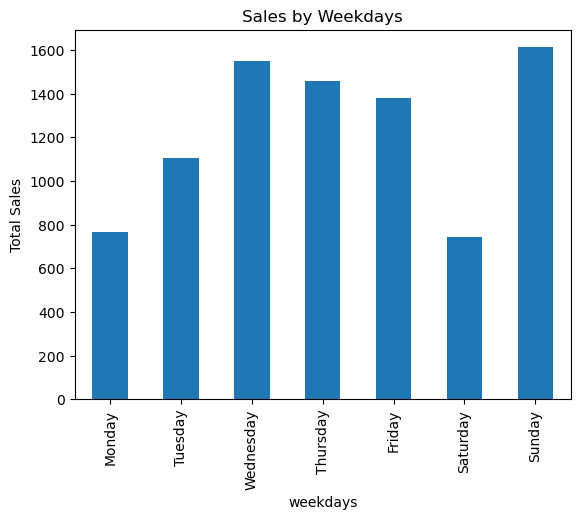

In [42]:
df.groupby('weekdays')['amount'].sum().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
).plot(kind='bar',title='Sales by Weekdays')
plt.ylabel('Total Sales')
plt.show()

In [43]:
reapet_customer = df['customer_id'].value_counts()
repeat_customers = reapet_customer[reapet_customer  > 1]
print('Repeat Customer')
print(repeat_customers)

Repeat Customer
customer_id
1004    10
1000     9
1015     8
1018     7
1003     7
1011     7
1016     6
1002     6
1009     6
1017     5
1001     5
1012     4
1007     3
1006     3
1013     3
1019     3
1008     3
1010     3
1014     2
Name: count, dtype: int64


In [44]:
weekly_sales = df.groupby('week')['amount'].sum()
weekly_growth = weekly_sales.pct_change().fillna(0) * 100
print('Weekly Sales Growth (%):')
print(weekly_growth)

Weekly Sales Growth (%):
week
22      0.000000
23    444.022004
24    -23.573157
25     12.187238
26    -27.445624
27    -24.931073
28    -17.198849
29    107.818603
30     47.496098
31    -58.063088
32     32.834629
33     44.032180
34     24.525229
35    -37.509322
36     -2.826158
Name: amount, dtype: float64


In [45]:
from scipy.stats import zscore

df['z_score'] = zscore(df['amount'])


outliers = df[df['z_score'].abs() > 2]
print("outlier Transachtion:")
print(outliers[['date','amount','z_score']])

outlier Transachtion:
         date  amount   z_score
48 2024-07-19  323.66  2.874743
53 2024-07-24  320.16  2.832387
78 2024-08-18  262.69  2.136905
82 2024-08-22  371.76  3.456833
85 2024-08-25  261.27  2.119721
